In [1]:
import numpy as np
import qutip
from math import pi
from scipy.linalg import expm
from pauli import sigma_x, sigma_y, sigma_z
from fmt import format_angle, format_state, format_xyz
from bloch import state_to_bloch, bloch_to_state, xyz_from_bloch

In [2]:
i = 1j
state0 = np.array([1, 0])
state1 = np.array([0, 1])

Получаем оператор поворота кубита на угол $\alpha$ относительно оси нормированного вектора $\bar{n}$

Действуем оператором на начальное состояние для получения конечного состояния, отображаем их на сфере Блоха

$\hat{U}(\alpha, \bar{n}) = exp({i\frac{\alpha}{2}(n_x\hat{\sigma_x} + n_y\hat{\sigma_z} + n_y\hat{\sigma_z})})$

$\ket{\psi} = cos(\frac{\theta}{2})\ket{0} + e^{i\phi}sin(\frac{\theta}{2})\ket{1}$

In [3]:
start_theta = 0
start_phi = 0
n = np.array([0, 1, 0])
alpha = pi/2
start_state = bloch_to_state(start_theta, start_phi)

In [4]:
nx = n[0]
ny = n[1]
nz = n[2]

U = expm(-i*alpha/2*(nx*sigma_x + ny*sigma_y + nz*sigma_z))
end_state = np.dot(U, start_state)

In [5]:
theta, phi = state_to_bloch(start_state)
start_point = xyz_from_bloch(theta, phi)
print('Start state')
print(f'{format_state(start_state)}: theta = {format_angle(theta)}, phi = {format_angle(phi)}')
print(f'(x, y, z) = {format_xyz(*start_point)}')
print()

print('End state')
theta, phi = state_to_bloch(end_state)
end_point = xyz_from_bloch(theta, phi)
print(f'{format_state(end_state)}: theta = {format_angle(theta)}, phi = {format_angle(phi)}')
print(f'(x, y, z) = {format_xyz(*end_point)}')

Start state
[(1+0j), 0j]: theta = 0, phi = 0
(x, y, z) = (0, 0, 1)

End state
[(0.707+0j), (0.707+0j)]: theta = 0.5pi, phi = 0
(x, y, z) = (1, 0, 0.0)


c:\Users\user\Desktop\физика\lector_task\venv\lib\site-packages\qutip\bloch.py:814: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  self.axes.plot(arc[1, :], -arc[0, :], arc[2, :], fmt, **kw)


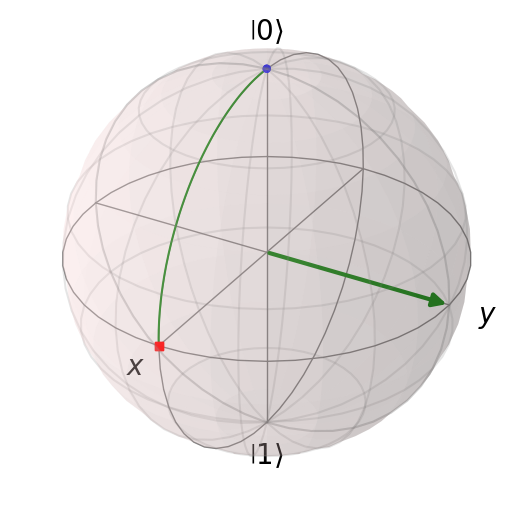

In [9]:
b = qutip.Bloch()
b.add_points(start_point)
b.add_points(end_point)
b.add_vectors(n)
b.add_arc(start_point, end_point, color='g')
b.show()